<a href="https://colab.research.google.com/github/JosePimienta/Zonas-WIFI/blob/main/Estudio_de_zonas_wifi_en_la_ciudad_de_Cartagena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install --upgrade folium

Importar desde Drive

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar librerias

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geopandas as gpd
from tabulate import tabulate

Cargar archivo

In [141]:
#Cargar datos CSV
df = pd.read_csv("/content/drive/MyDrive/Zonas WIFI/Uso_de_Zonas_Wifi_Cartagena.csv")

# Cargar el GeoJSON con geopandas
gdf = gpd.read_file("/content/drive/MyDrive/Zonas WIFI/Barrios_de_Cartagena.geojson")

Lista de corregimientos o barrios

In [142]:
# Extraer barrios únicos
barrios_unicos = df["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
data = [[i, barrio] for i, barrio in enumerate(barrios_unicos)]

# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimientos o barrios de toda la ciudad

In [143]:
# Crear el mapa centrado en una ubicación
mapa_general = folium.Map(location=[10.4, -75.5], zoom_start = 12)

# Agregar cada barrio con su nombre en el tooltip
for _, barrio in gdf.iterrows():
    folium.GeoJson(
        barrio.geometry,
        tooltip = barrio["NOMBRE"]  # Clave de nombre en GeoJSON
    ).add_to(mapa_general)

# Mostrar el mapa
mapa_general

Ingreso de corregimiento o barrio

In [163]:
# Mostrar como tabla
print(tabulate(data, headers=["Índice", "Barrio"], tablefmt="grid"))

# Seleccionar barios
barrio_seleccionado = input("INGRESE UNO O MAS BARRIOS EN MAYÚSCULA SEPARADOS POR COMAS (,): ")

+----------+-------------------------+
|   Índice | Barrio                  |
+==========+=========================+
|        0 | NUEVO PARAISO           |
+----------+-------------------------+
|        1 | CIUDAD DEL BICENTENARIO |
+----------+-------------------------+
|        2 | LA BOQUILLA             |
+----------+-------------------------+
|        3 | PONTEZUELA              |
+----------+-------------------------+
|        4 | BAYUNCA                 |
+----------+-------------------------+
|        5 | CIUDADELA LA PAZ        |
+----------+-------------------------+
|        6 | COLOMBIATON             |
+----------+-------------------------+
|        7 | EL SOCORRO              |
+----------+-------------------------+
|        8 | PUNTA CANOA             |
+----------+-------------------------+
|        9 | TIERRA BOMBA            |
+----------+-------------------------+
|       10 | SAN FRANCISCO           |
+----------+-------------------------+
|       11 | EL BOSQUE   

Mapa de corregimiento o barrio seleccionado

In [164]:
# Crear el mapa centrado en Cartagena
mapa_seleccion = folium.Map(location=[10.4, -75.5], zoom_start=13)

# separar barrios por comas
barrios_seleccionados = [b.strip() for b in barrio_seleccionado.split(",")]

# Filtrar los barrios en el GeoDataFrame
barrios_filtrados = gdf[gdf["NOMBRE"].isin(barrios_seleccionados)]

# Encontrar los barrios que NO están en el GeoJSON
barrios_no_encontrados = [b for b in barrios_seleccionados if b not in barrios_filtrados["NOMBRE"].values]

# Verificar si se encontraron barrios en el GeoJSON
if not barrios_filtrados.empty:
    for _, barrio in barrios_filtrados.iterrows():
        #print(barrio_seleccionado)
        folium.GeoJson(
            barrio.geometry,
            tooltip=barrio["NOMBRE"]
        ).add_to(mapa_seleccion)

# Mostrar los barrios que no se encontraron
if barrios_no_encontrados:
    print("\nLos siguientes barrios NO fueron encontrados en el GeoJSON:")
    for barrio in barrios_no_encontrados:
        print("-", barrio)

# Mostrar el mapa
mapa_seleccion


Barrios filtrados

In [165]:
# Filtrar barrios seleccionados
df_filtrado = df[df["Corregimiento/Barrio"].isin(barrios_seleccionados)]

Barrios únicos

In [166]:
# Extraer barrios únicos
filtro_unico = df_filtrado["Corregimiento/Barrio"].drop_duplicates().tolist()

# Crear datos como lista de listas
data_filtro = [[i, barrrio] for i, barrrio in enumerate(filtro_unico)]

# Mostrar como tabla
print(tabulate(data_filtro, headers=["Índice", "Barrio"], tablefmt="grid"))

+----------+--------------+
|   Índice | Barrio       |
+==========+==============+
|        0 | LOS JARDINES |
+----------+--------------+
|        1 | LAS PALMERAS |
+----------+--------------+


Datos de barrios filtrados

In [167]:
df_filtrado

Corregimiento/Barrio                               Zona Wifi  \
3381         LOS JARDINES  INSPECCION DE POLICIA ALTOS DEL JARDIN   
3382         LOS JARDINES  INSPECCION DE POLICIA ALTOS DEL JARDIN   
3383         LOS JARDINES  INSPECCION DE POLICIA ALTOS DEL JARDIN   
3384         LOS JARDINES  INSPECCION DE POLICIA ALTOS DEL JARDIN   
3385         LOS JARDINES  INSPECCION DE POLICIA ALTOS DEL JARDIN   
...                   ...                                     ...   
3924         LAS PALMERAS   INSPECCION DE POLICIA DE LAS PALMERAS   
3925         LAS PALMERAS   INSPECCION DE POLICIA DE LAS PALMERAS   
3926         LAS PALMERAS   INSPECCION DE POLICIA DE LAS PALMERAS   
3927         LAS PALMERAS   INSPECCION DE POLICIA DE LAS PALMERAS   
3928         LAS PALMERAS   INSPECCION DE POLICIA DE LAS PALMERAS   

                       Fecha  Visitas  Logins  Dispositivos Nuevos  Sesiones  \
3381  01/01/2024 12:00:00 AM        0       0                    0         0   
3382  01/02/2024 12:00:00 AM        0       0                    0         0   
3383  01/03/2024 12:00:00 AM        0       0                    0         0   
3384  01/04/2024 12:00:00 AM        0       0                    0         0   
3385  01/05/2024 12:00:00 AM       18      16                   13         1   
...                      ...      ...     ...                  ...       ...   
3924  09/26/2024 12:00:00 AM       77      69                   33       475   
3925  09/27/2024 12:00:00 AM      123     109                   39       686   
3926  09/28/2024 12:00:00 AM       75      63                   31       471   
3927  09/29/2024 12:00:00 AM       76      68                   36       495   
3928  09/30/2024 12:00:00 AM       85      79                   34       639   

      Consumidores  
3381           0.0  
3382           0.0  
3383           0.0  
3384           0.0  
3385           1.0  
...            ...  
3924          29.0  
3925          36.0  
3926          27.0  
3927          33.0  
3928          32.0  

[548 rows x 8 columns]

Gráficos de **Dispositivos Nuevos** de barrios seleccionados

In [169]:
# Asegurar que la columna Fecha es de tipo datetime64
df_filtrado = df_filtrado.copy()
df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])  # Mantener datetime

# Obtener fecha mínima y máxima
fecha_min = df_filtrado["Fecha"].min()
fecha_max = df_filtrado["Fecha"].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2024-01-01 00:00:00
Fecha máxima: 2024-09-30 00:00:00


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display


# Crear slider de selección de rango de fechas
slider_fechas = widgets.SelectionRangeSlider(
    options=[(fecha.strftime("%Y-%m-%d"), fecha) for fecha in df_filtrado["Fecha"].unique()],
    index=(0, len(df_filtrado["Fecha"].unique()) - 1),
    description="Rango:",
    continuous_update=False,
    layout=widgets.Layout(width="80%")
)

# Función para actualizar los gráficos dinámicamente
def actualizar_grafico(rango):
    fecha_inicio, fecha_fin = rango
    df_rango = df_filtrado[(df_filtrado["Fecha"] >= fecha_inicio) & (df_filtrado["Fecha"] <= fecha_fin)]

    # Convertir nombre del mes (maneja múltiples meses)
    meses_en_rango = df_rango["Fecha"].dt.strftime("%B").unique()
    nombre_mes = ", ".join(meses_en_rango) if len(meses_en_rango) > 0 else "Sin datos"

    for barrio in barrios_seleccionados:
        df_barrio = df_rango[df_rango["Corregimiento/Barrio"] == barrio]

        # Crear figura
        plt.figure(figsize=(12, 5))
        plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='--', label=barrio)

        # Configuración de ejes y título
        plt.xticks(df_barrio["Fecha"], rotation=90)
        plt.title(f"Dispositivos Nuevos en {nombre_mes}")
        plt.xlabel("Fecha")
        plt.ylabel("Cantidad de Dispositivos")
        plt.legend(title="Barrio")
        plt.grid()
        plt.show()
# Conectar la función con el slider
grafico_interactivo = widgets.interactive_output(actualizar_grafico, {"rango": slider_fechas})

# Mostrar el selector y gráficos interactivos
display(widgets.VBox([slider_fechas, grafico_interactivo]))

In [180]:
# Conectar la función con el slider
grafico_interactivo = widgets.interactive_output(actualizar_grafico, {"rango": slider_fechas})

# Mostrar el selector y gráficos interactivos
display(widgets.VBox([slider_fechas]))

In [149]:
# Hace una copia para evitar modificar el original
df_filtrado = df_filtrado.copy()

# Convertir la columna "Fecha" a datetime
df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])

# Seleccionar mes a consultar
mes = int(input("Ingrese el mes a consultar: "))

<ipython-input-149-dd443cd7eefd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])


Ingrese el mes a consultar: 6



Gráfico para EL SOCORRO:
zona Wifi:  JORGE ARTEL


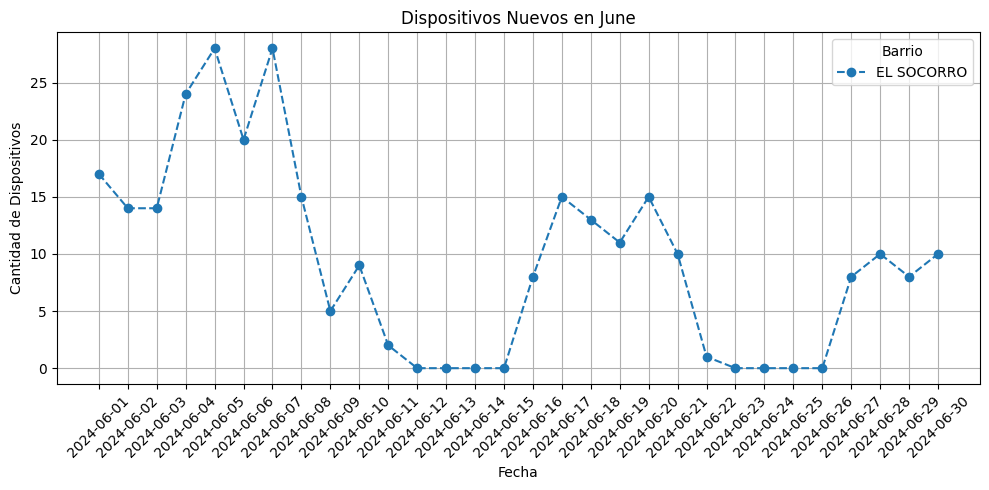


Gráfico para TERNERA:
zona Wifi:  INSPECCION DE POLICIA DE TERNERA


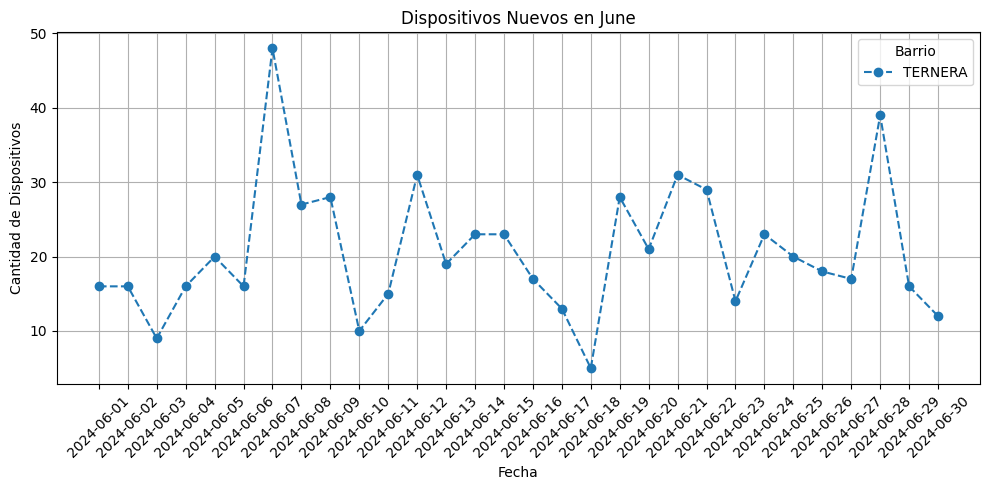

In [150]:
# Seleccionar mes de conjunto de datos
df_mes = df_filtrado[df_filtrado["Fecha"].dt.month == mes]

# Mes en texto (en español)
nombre_mes = pd.to_datetime(str(mes), format='%m').strftime('%B')
#zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")

    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    #zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]
    # Extraer barrios únicos
    filtro_unico = df_barrio['Zona Wifi'].drop_duplicates().tolist()
    print("zona Wifi: ", filtro_unico[0])
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Dispositivos Nuevos en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Dispositivos")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

Comparación de nuevos dispositivos en barrios seleccionados

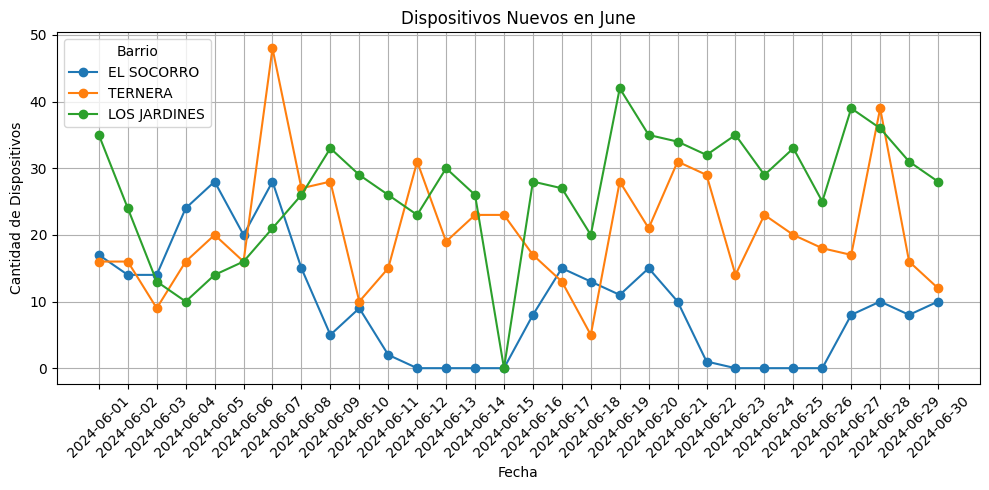

In [77]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Dispositivos Nuevos"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Dispositivos Nuevos en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Dispositivos")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de **Visitas**


Gráfico para EL SOCORRO:


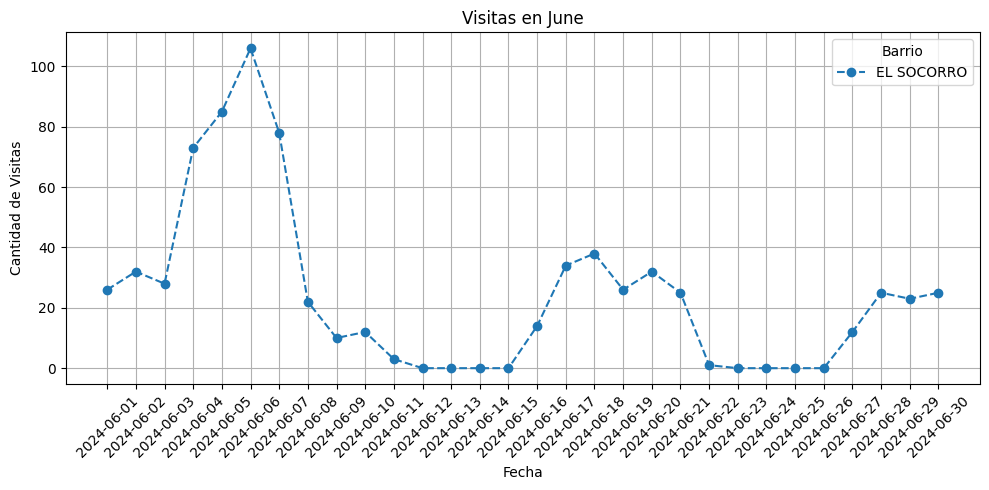


Gráfico para TERNERA:


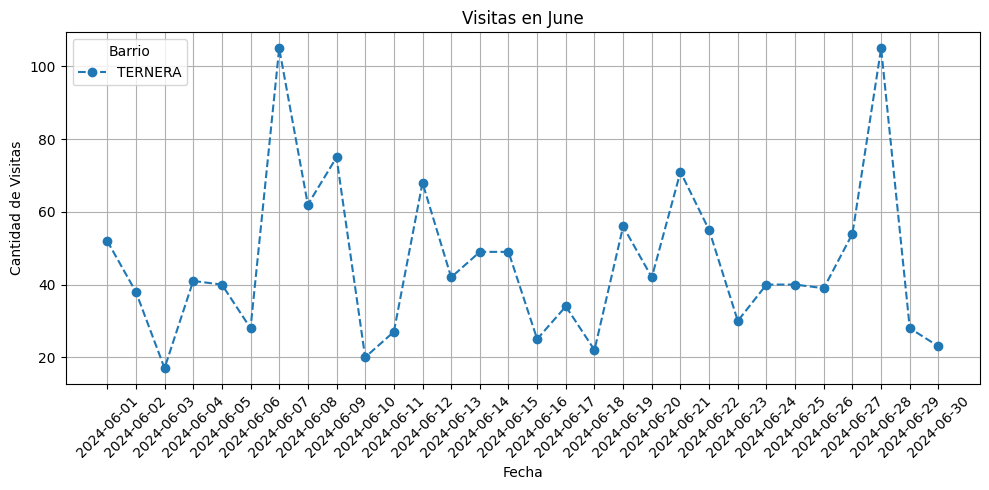


Gráfico para LOS JARDINES:


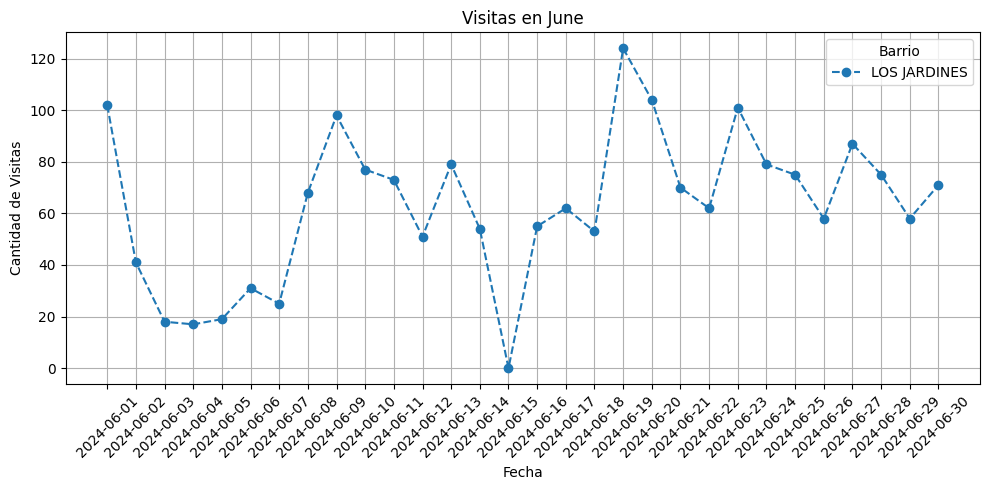

In [78]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Visitas"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Visitas en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Visitas")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

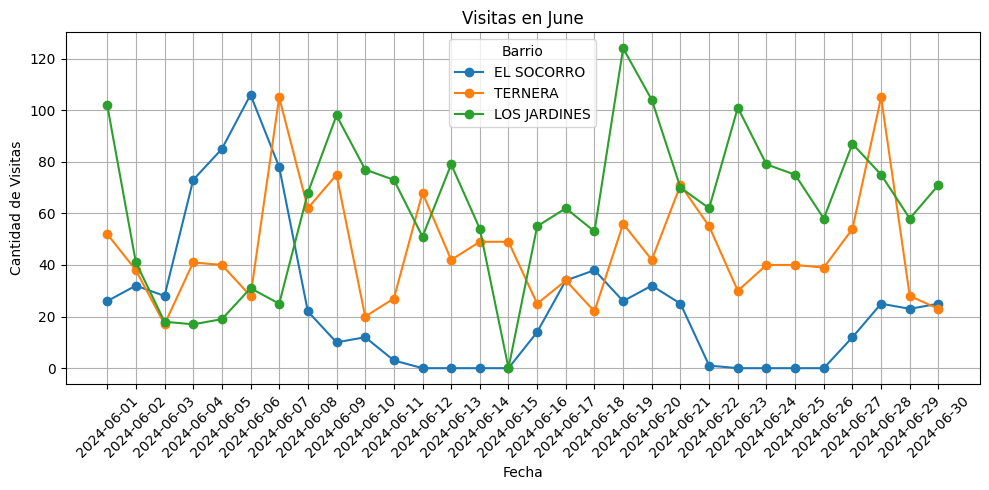

In [79]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Visitas"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Visitas en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Visitas")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de **Sesiones**


Gráfico para EL SOCORRO:


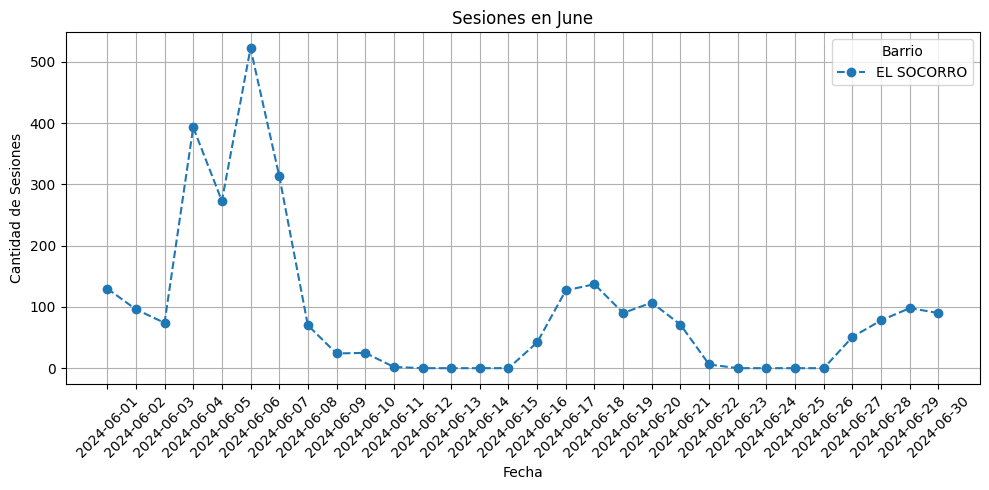


Gráfico para TERNERA:


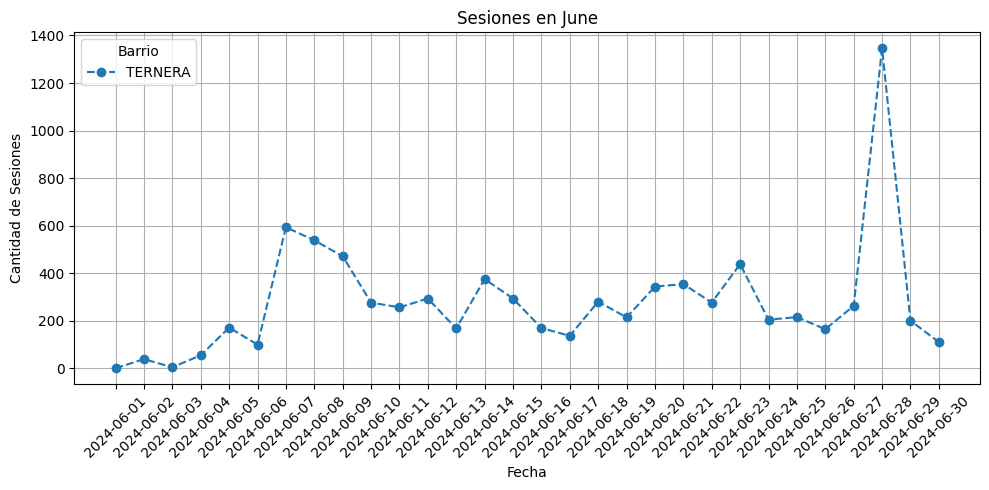


Gráfico para LOS JARDINES:


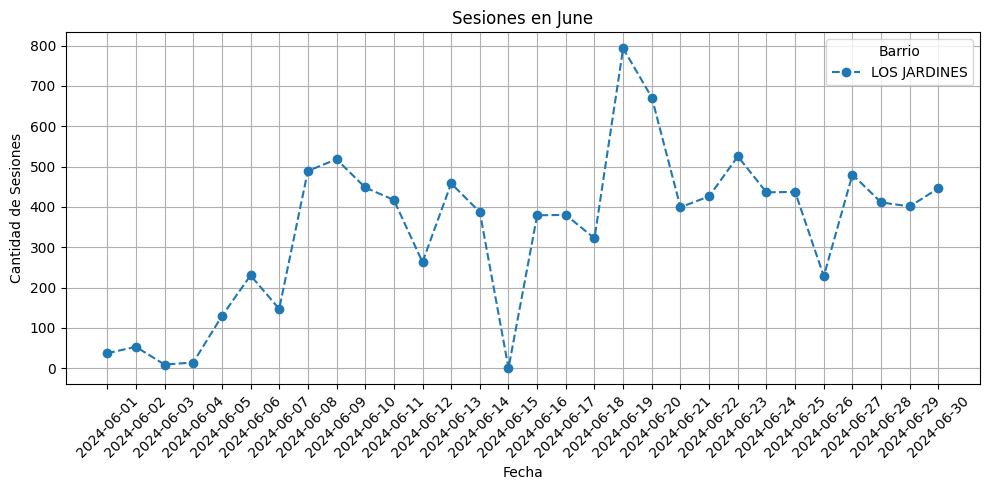

In [80]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Sesiones"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Sesiones en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Sesiones")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

Comparación de **Sesiones**

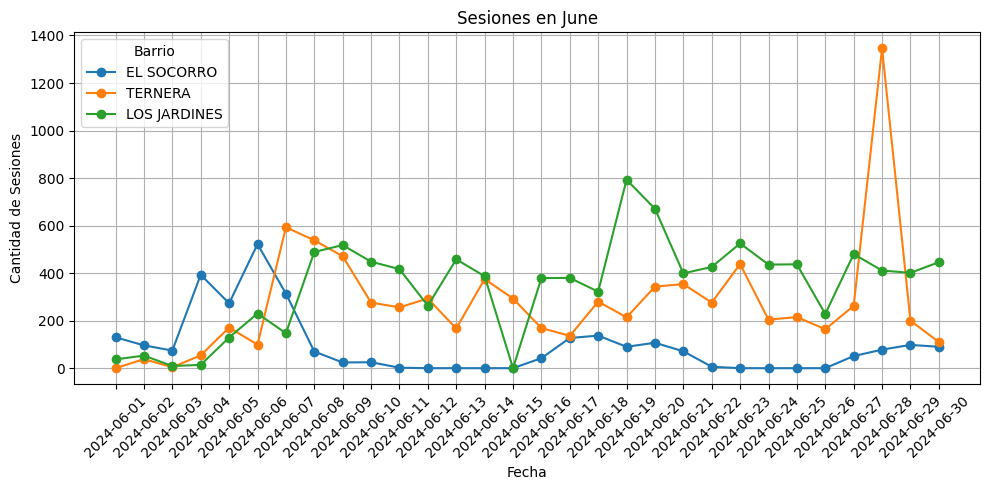

In [81]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Sesiones"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Sesiones en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Sesiones")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de **Logins**


Gráfico para EL SOCORRO:


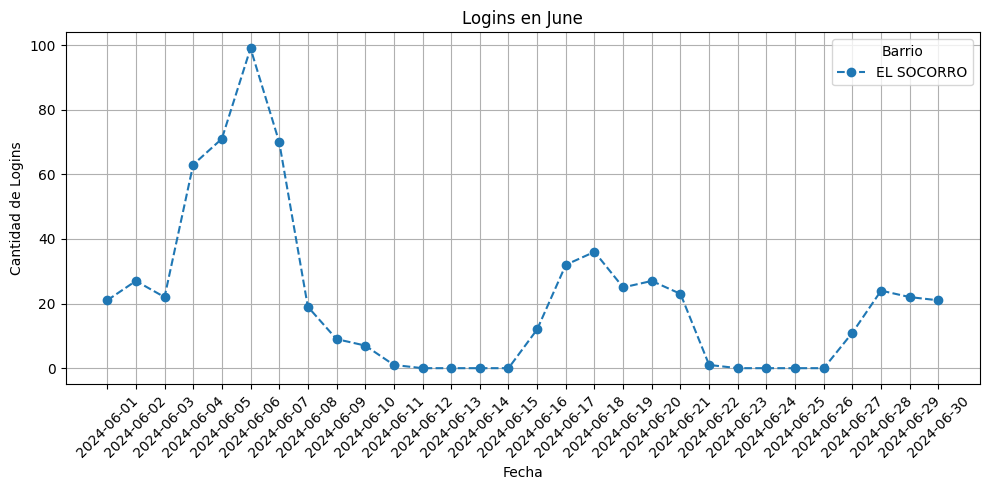


Gráfico para TERNERA:


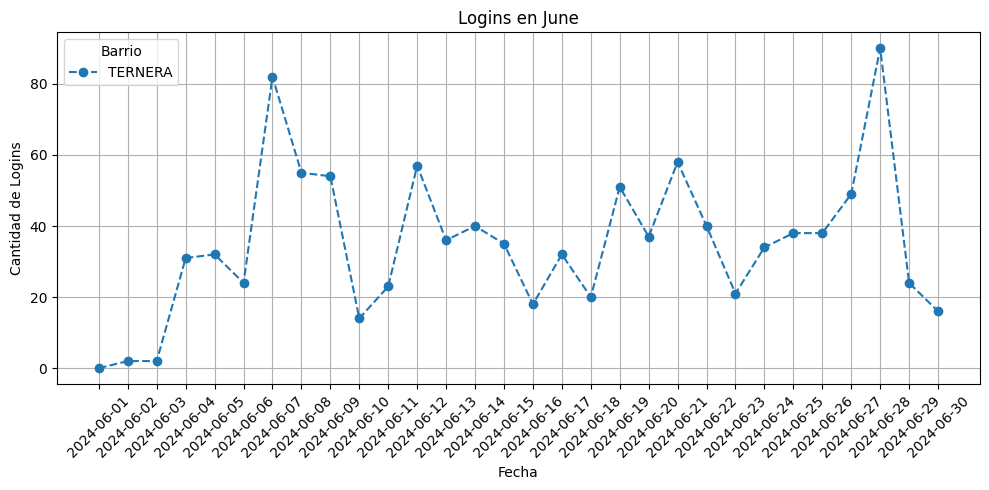


Gráfico para LOS JARDINES:


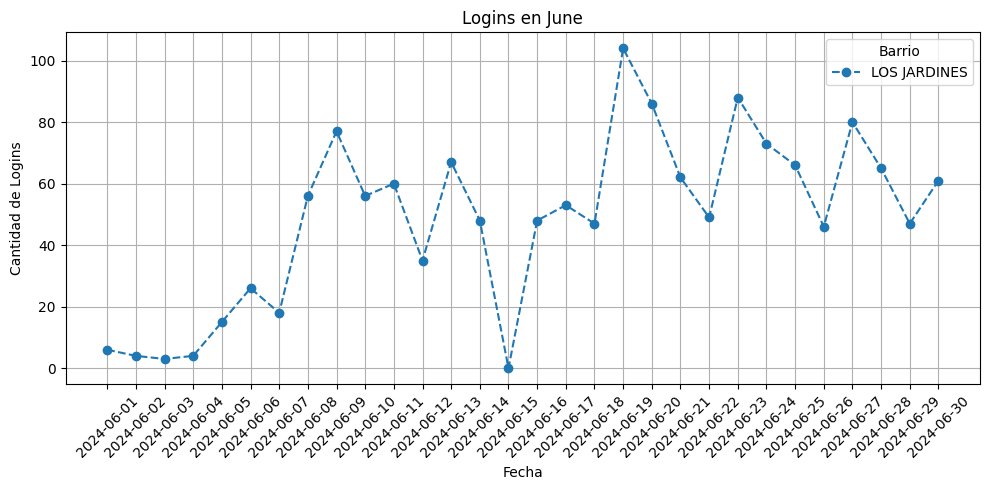

In [82]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Logins"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Logins en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Logins")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

Comparación de **Logins**

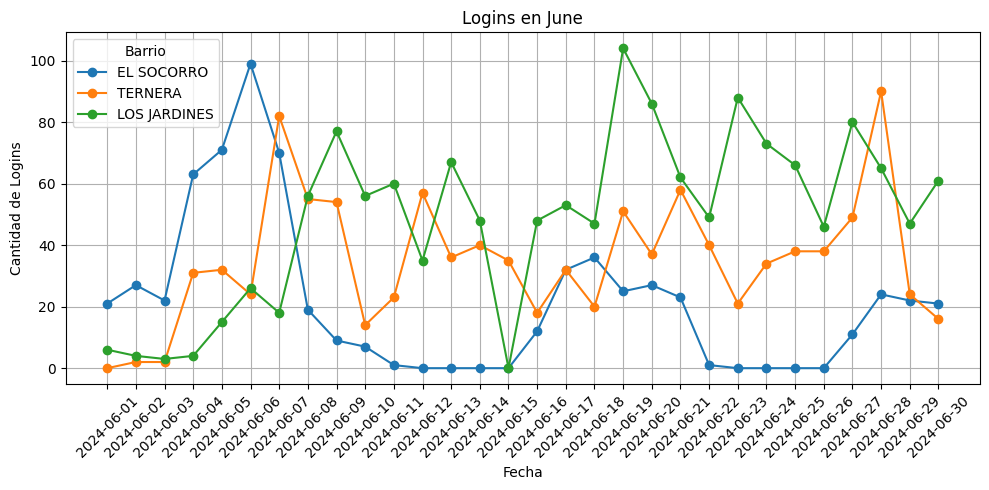

In [83]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Logins"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Logins en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Logins")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de **Consumidores**


Gráfico para EL SOCORRO:


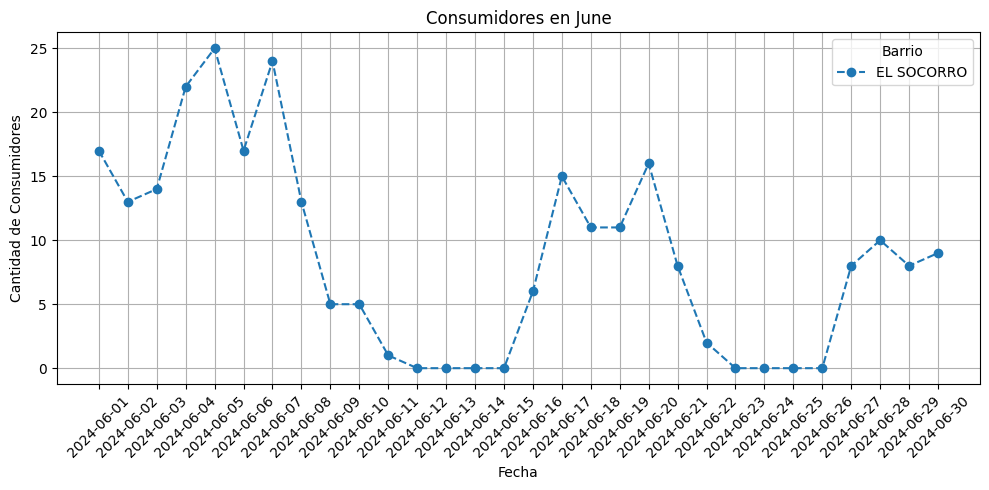


Gráfico para TERNERA:


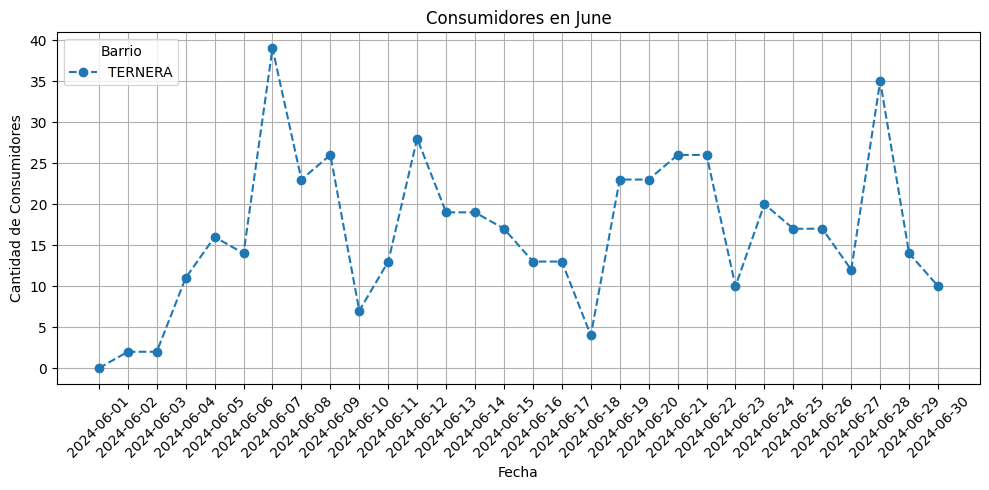


Gráfico para LOS JARDINES:


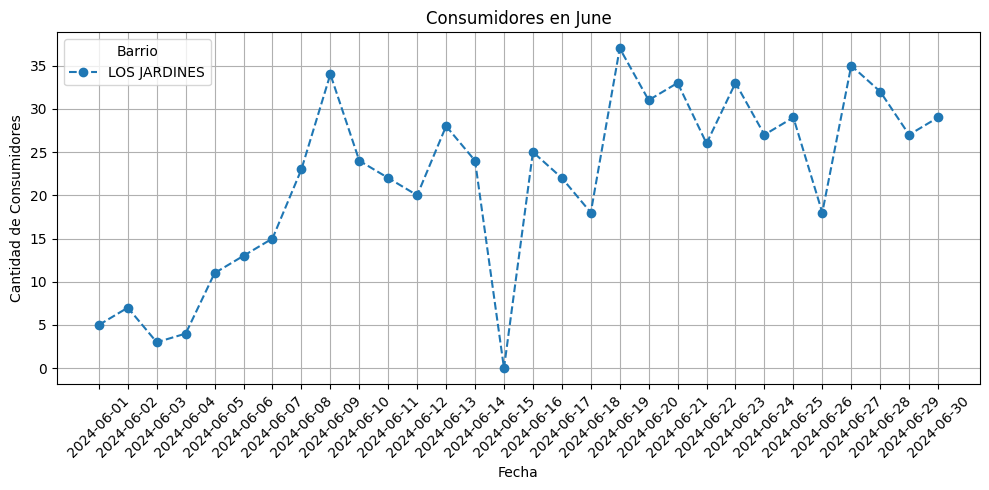

In [84]:
# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    print(f"\nGráfico para {barrio}:")
    # Crear la figura
    plt.figure(figsize=(10, 5))

    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Consumidores"], marker='o', linestyle='--', label=barrio)
    # Rotar etiquetas del eje X para mejor visualización
    plt.xticks(df_barrio['Fecha'], rotation = 45)
    plt.title(f"Consumidores en {nombre_mes}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Consumidores")
    plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
    plt.tight_layout()
    plt.grid()
    plt.show()

Comparación de **Consumidores**

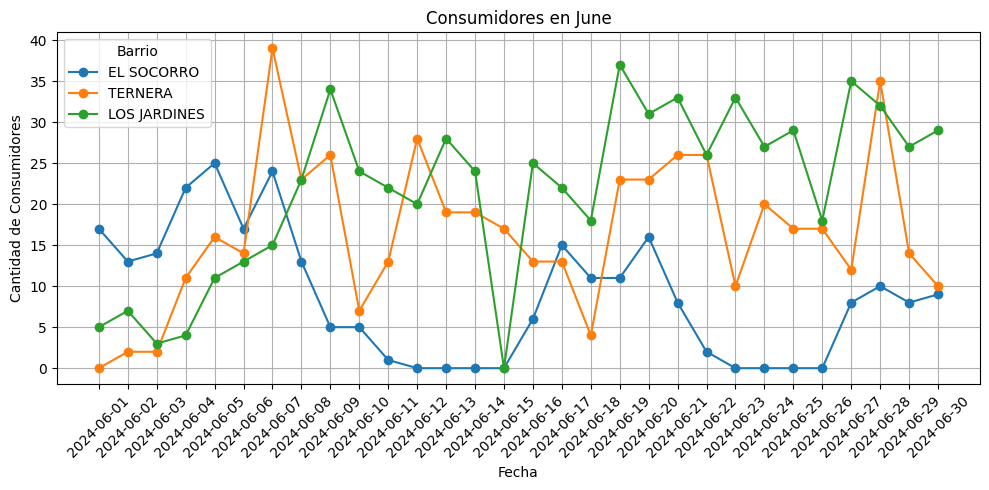

In [85]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.plot(df_barrio["Fecha"], df_barrio["Consumidores"], marker='o', linestyle='-', label=barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(df_barrio['Fecha'], rotation=45)
plt.title(f"Consumidores en {nombre_mes}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Consumidores")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()


Gráfico de **Barrios** vs **Dispositivos Nuevos**

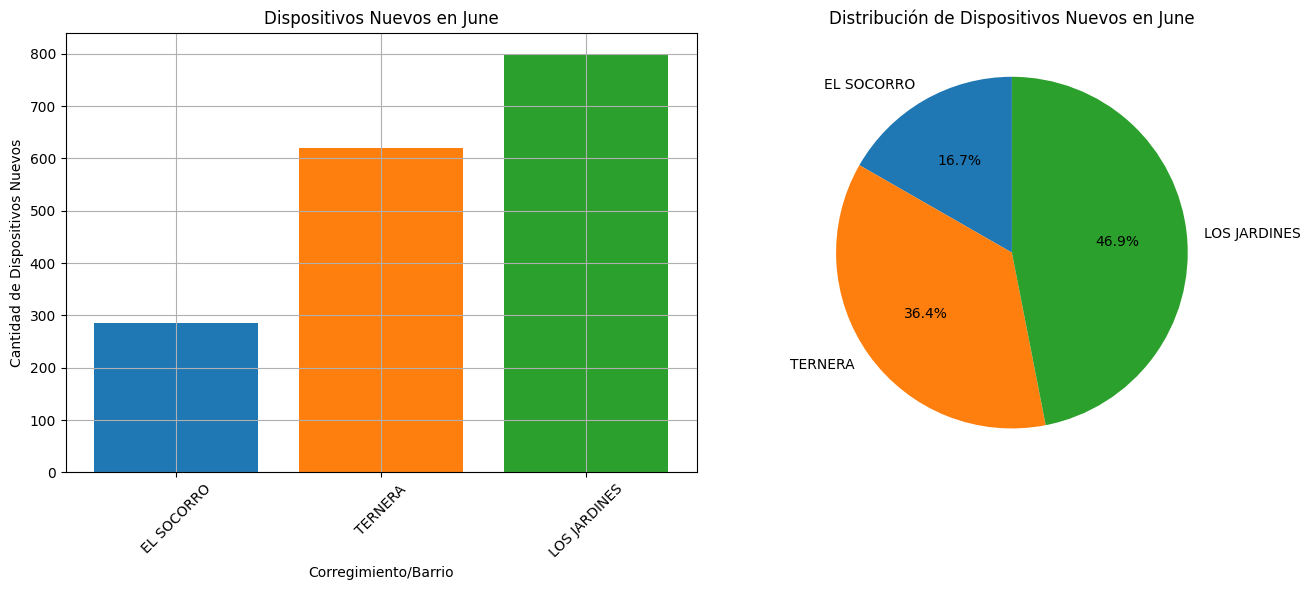

In [86]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Lista para almacenar las Dispositivos Nuevos por barrio
Dispositivos_Nuevos_por_barrio = []

# Gráfico de barras en la primera posición (axes[0])
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    axes[0].bar(df_barrio["Corregimiento/Barrio"], df_barrio["Dispositivos Nuevos"].sum())
    total_Dispositivos_Nuevos = df_barrio["Dispositivos Nuevos"].sum()  # Sumar las Dispositivos Nuevos de ese barrio
    Dispositivos_Nuevos_por_barrio.append(total_Dispositivos_Nuevos)  # Agregar el total a la lista

# Personalizar gráfico de barras
axes[0].set_xticks(range(len(barrios_seleccionados)))
axes[0].set_xticklabels(barrios_seleccionados, rotation=45)
#
axes[0].set_title(f"Dispositivos Nuevos en {nombre_mes}")
axes[0].set_xlabel("Corregimiento/Barrio")
axes[0].set_ylabel("Cantidad de Dispositivos Nuevos")
axes[0].grid()

# Gráfico circular en la segunda posición (axes[1])
axes[1].pie(Dispositivos_Nuevos_por_barrio, labels=barrios_seleccionados, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f"Distribución de Dispositivos Nuevos en {nombre_mes}")

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Gráfico de **Barrios** vs **Consumidores**

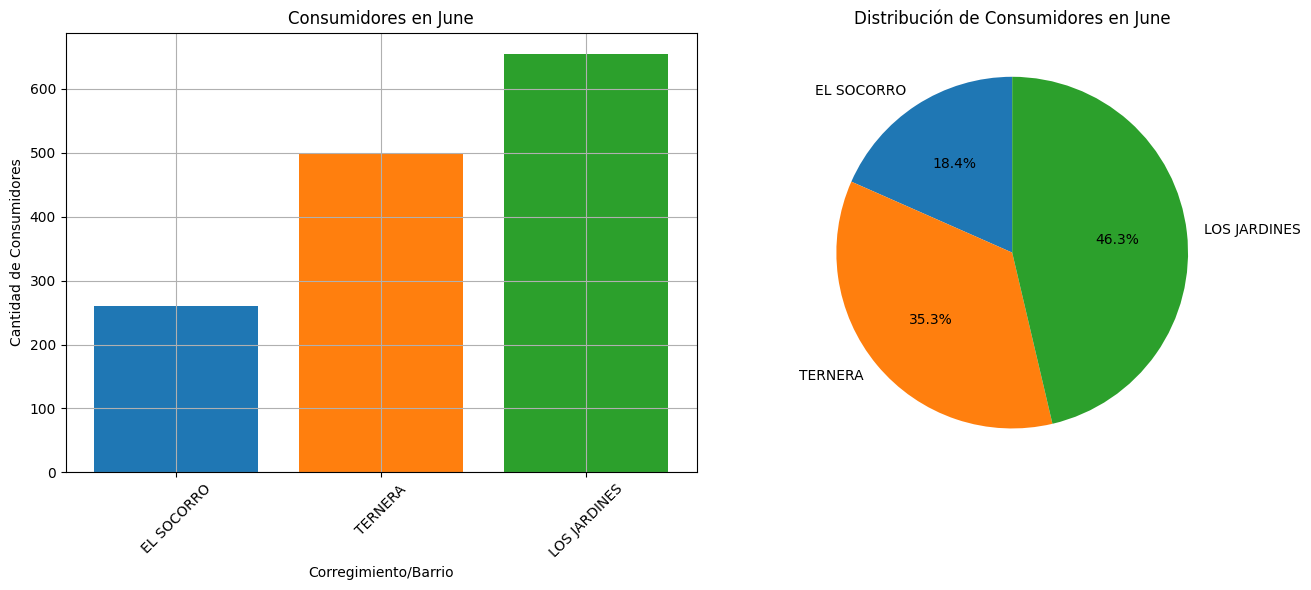

In [87]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Lista para almacenar las Consumidores por barrio
Consumidores_por_barrio = []

# Gráfico de barras en la primera posición (axes[0])
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    axes[0].bar(df_barrio["Corregimiento/Barrio"], df_barrio["Consumidores"].sum())
    total_Consumidores = df_barrio["Consumidores"].sum()  # Sumar las Consumidores de ese barrio
    Consumidores_por_barrio.append(total_Consumidores)  # Agregar el total a la lista

# Personalizar gráfico de barras
axes[0].set_xticks(range(len(barrios_seleccionados)))
axes[0].set_xticklabels(barrios_seleccionados, rotation=45)
#
axes[0].set_title(f"Consumidores en {nombre_mes}")
axes[0].set_xlabel("Corregimiento/Barrio")
axes[0].set_ylabel("Cantidad de Consumidores")
axes[0].grid()

# Gráfico circular en la segunda posición (axes[1])
axes[1].pie(Consumidores_por_barrio, labels=barrios_seleccionados, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f"Distribución de Consumidores en {nombre_mes}")

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Gráfico de **Barrios** vs **Visitas**

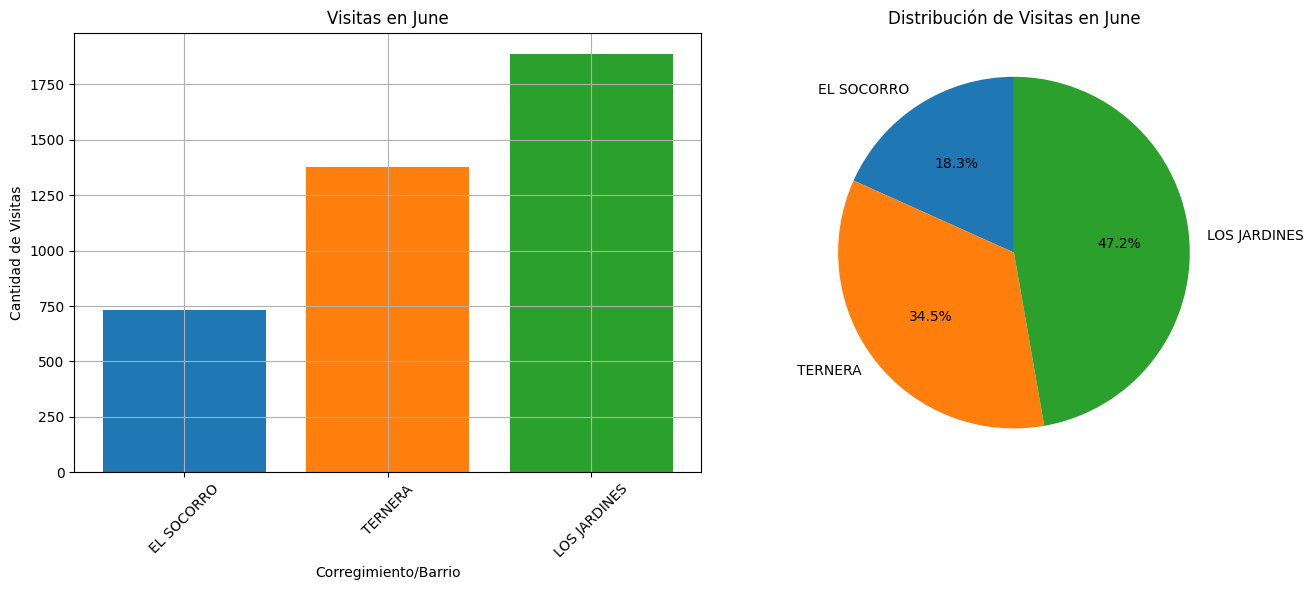

In [88]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Lista para almacenar las Visitas por barrio
Visitas_por_barrio = []

# Gráfico de barras en la primera posición (axes[0])
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    axes[0].bar(df_barrio["Corregimiento/Barrio"], df_barrio["Visitas"].sum())
    total_Visitas = df_barrio["Visitas"].sum()  # Sumar las Visitas de ese barrio
    Visitas_por_barrio.append(total_Visitas)  # Agregar el total a la lista

# Personalizar gráfico de barras
axes[0].set_xticks(range(len(barrios_seleccionados)))
axes[0].set_xticklabels(barrios_seleccionados, rotation=45)
#
axes[0].set_title(f"Visitas en {nombre_mes}")
axes[0].set_xlabel("Corregimiento/Barrio")
axes[0].set_ylabel("Cantidad de Visitas")
axes[0].grid()

# Gráfico circular en la segunda posición (axes[1])
axes[1].pie(Visitas_por_barrio, labels=barrios_seleccionados, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f"Distribución de Visitas en {nombre_mes}")

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Gráfico de **Barrios** vs **Sesiones**

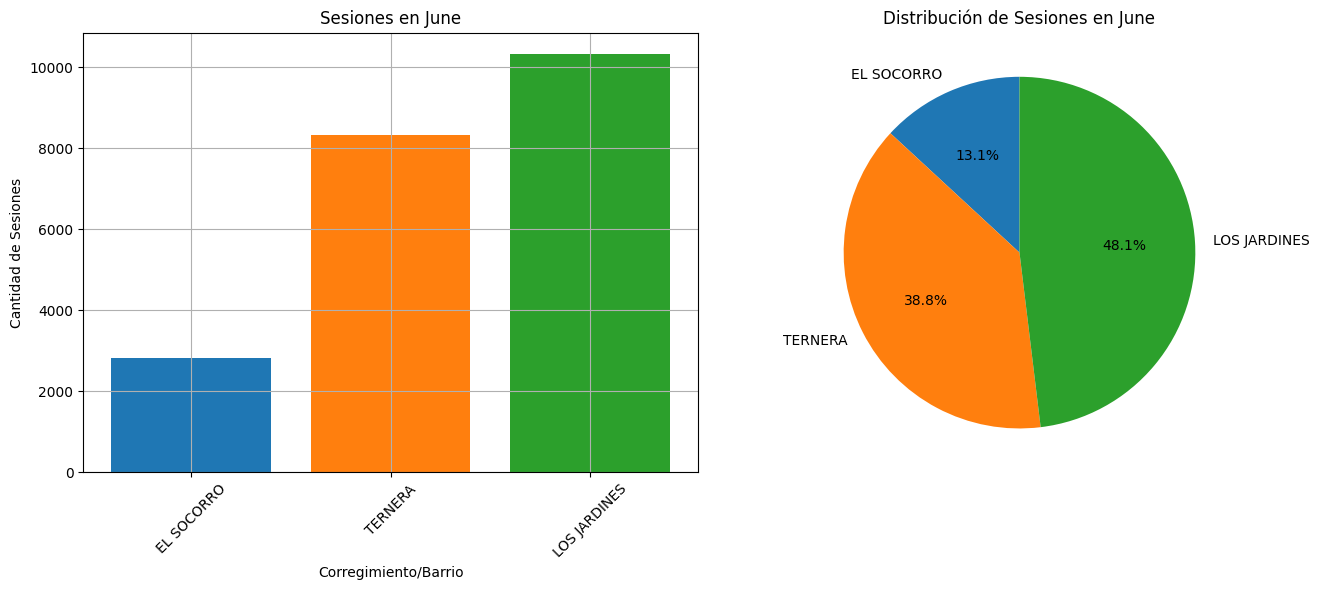

In [89]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Lista para almacenar las sesiones por barrio
sesiones_por_barrio = []

# Gráfico de barras en la primera posición (axes[0])
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    axes[0].bar(df_barrio["Corregimiento/Barrio"], df_barrio["Sesiones"].sum())
    total_sesiones = df_barrio["Sesiones"].sum()  # Sumar las sesiones de ese barrio
    sesiones_por_barrio.append(total_sesiones)  # Agregar el total a la lista

# Personalizar gráfico de barras
axes[0].set_xticks(range(len(barrios_seleccionados)))
axes[0].set_xticklabels(barrios_seleccionados, rotation=45)
#
axes[0].set_title(f"Sesiones en {nombre_mes}")
axes[0].set_xlabel("Corregimiento/Barrio")
axes[0].set_ylabel("Cantidad de Sesiones")
axes[0].grid()

# Gráfico circular en la segunda posición (axes[1])
axes[1].pie(sesiones_por_barrio, labels=barrios_seleccionados, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f"Distribución de Sesiones en {nombre_mes}")

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Gráfico de **Barrios** vs **Logins**

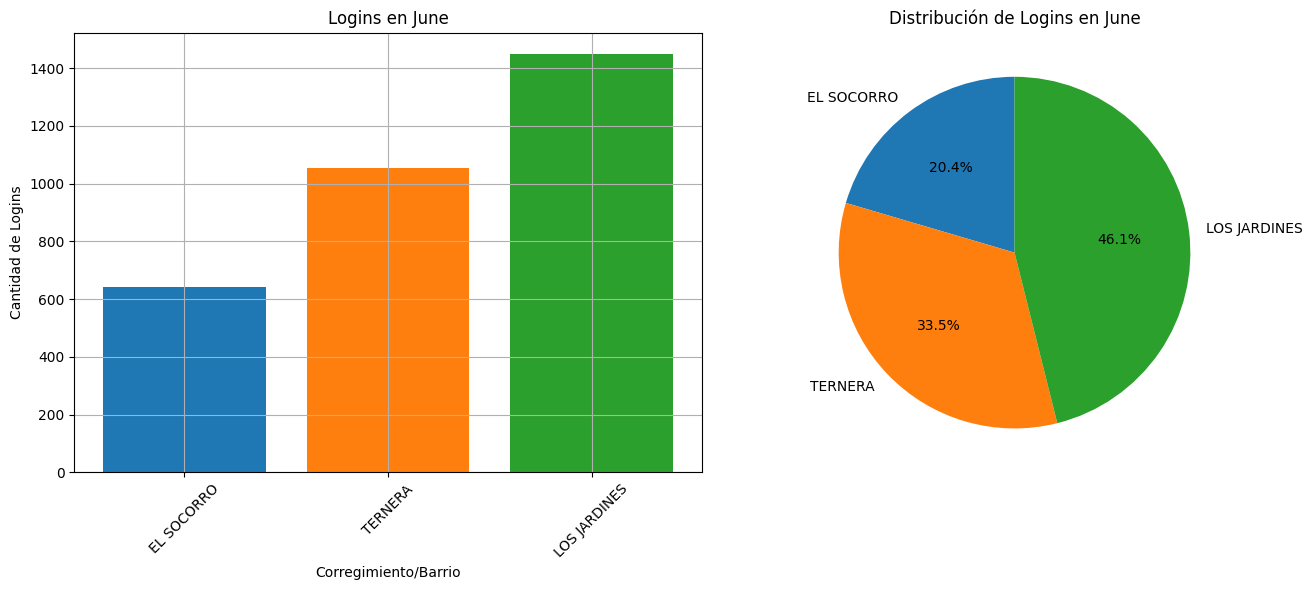

In [90]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Lista para almacenar las Logins por barrio
Logins_por_barrio = []

# Gráfico de barras en la primera posición (axes[0])
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    axes[0].bar(df_barrio["Corregimiento/Barrio"], df_barrio["Logins"].sum())
    total_Logins = df_barrio["Logins"].sum()  # Sumar las Logins de ese barrio
    Logins_por_barrio.append(total_Logins)  # Agregar el total a la lista

# Personalizar gráfico de barras
axes[0].set_xticks(range(len(barrios_seleccionados)))
axes[0].set_xticklabels(barrios_seleccionados, rotation=45)
#
axes[0].set_title(f"Logins en {nombre_mes}")
axes[0].set_xlabel("Corregimiento/Barrio")
axes[0].set_ylabel("Cantidad de Logins")
axes[0].grid()

# Gráfico circular en la segunda posición (axes[1])
axes[1].pie(Logins_por_barrio, labels=barrios_seleccionados, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f"Distribución de Logins en {nombre_mes}")

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


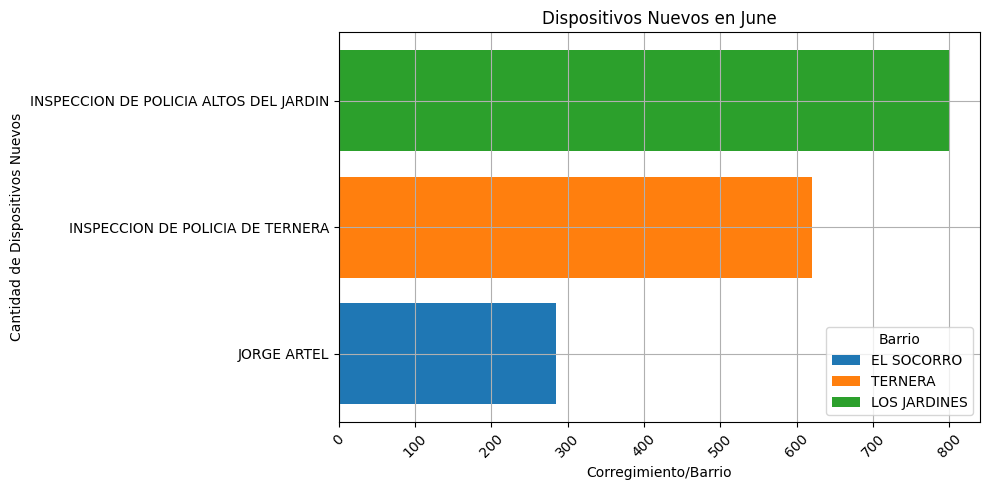

In [91]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.barh(df_barrio["Zona Wifi"], df_barrio["Dispositivos Nuevos"].sum(), label = barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)
plt.title(f"Dispositivos Nuevos en {nombre_mes}")
plt.xlabel("Corregimiento/Barrio")
plt.ylabel("Cantidad de Dispositivos Nuevos")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()

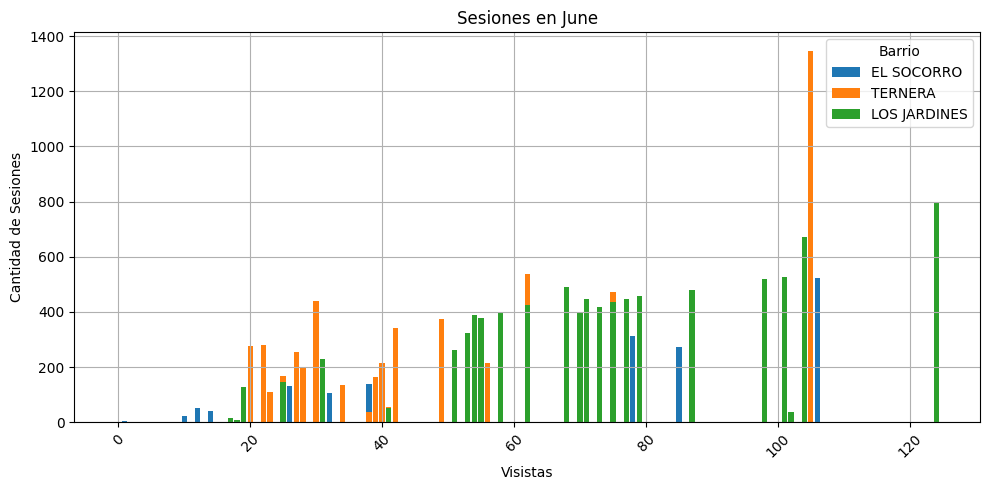

In [92]:
# Crear la figura
plt.figure(figsize=(10, 5))

# Iterar sobre cada barrio seleccionado y graficar por separado
for barrio in barrios_seleccionados:
    df_barrio = df_mes[df_mes["Corregimiento/Barrio"] == barrio]  # Filtrar datos del barrio
    plt.bar(df_barrio["Visitas"], df_barrio["Sesiones"], label = barrio)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)
plt.title(f"Sesiones en {nombre_mes}")
plt.xlabel("Visistas")
plt.ylabel("Cantidad de Sesiones")
plt.legend(title = "Barrio")  # Mostrar leyenda con los nombres de los barrios
plt.tight_layout()
plt.grid()
plt.show()

In [93]:
zona_wifi_ternera = df_filtrado.loc[df_filtrado["Corregimiento/Barrio"] == "LOS JARDINES", "Zona Wifi"]

# Extraer barrios únicos
filtro_unico = zona_wifi_ternera.drop_duplicates().tolist()

# Crear datos como lista de listas
data_filtro = [[i, barrrio] for i, barrrio in enumerate(filtro_unico)]
print(data_filtro)
# Mostrar como tabla
print(tabulate(data_filtro, headers=["Índice", "Barrio"], tablefmt="grid"))


[[0, 'INSPECCION DE POLICIA ALTOS DEL JARDIN']]
+----------+----------------------------------------+
|   Índice | Barrio                                 |
+==========+========================================+
|        0 | INSPECCION DE POLICIA ALTOS DEL JARDIN |
+----------+----------------------------------------+


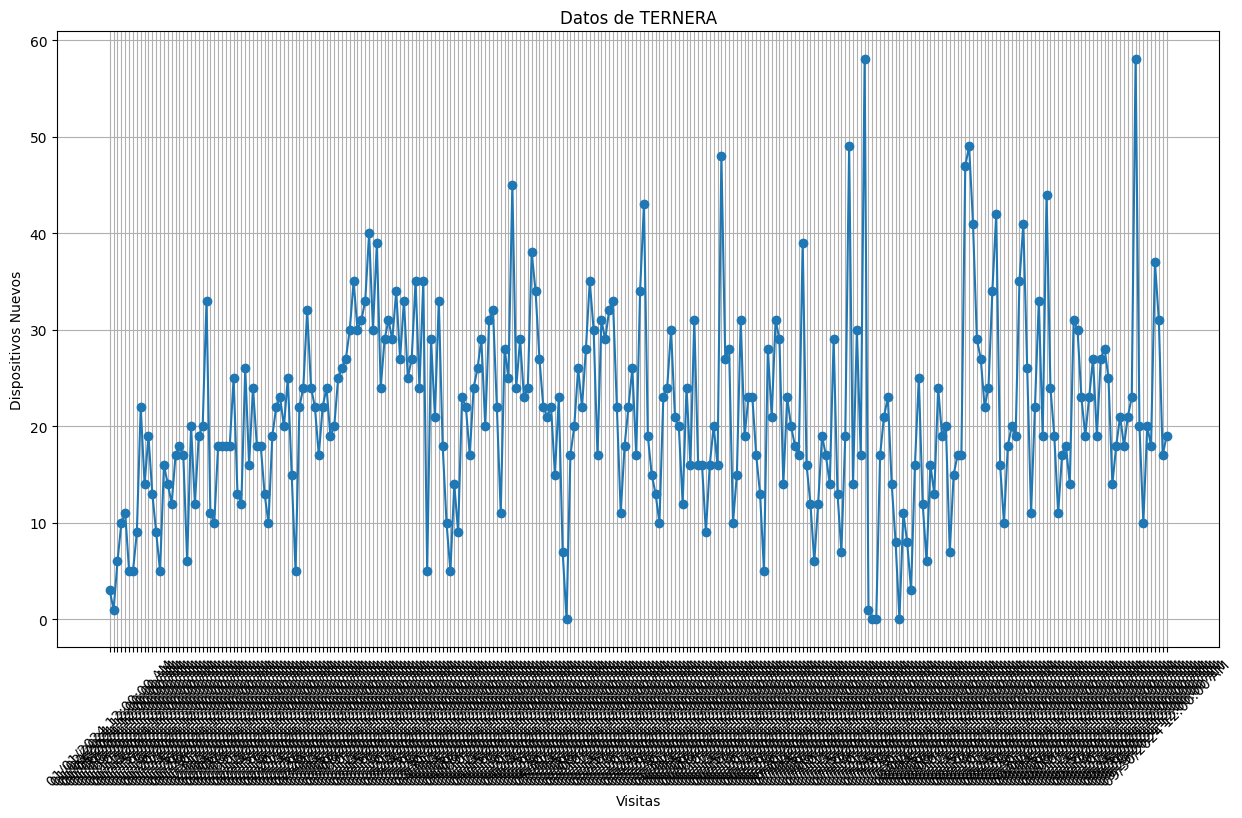

In [94]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado["Fecha"], df_filtrado["Dispositivos Nuevos"], marker='o', linestyle='-')
    #df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Visitas")
    plt.ylabel("Dispositivos Nuevos")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


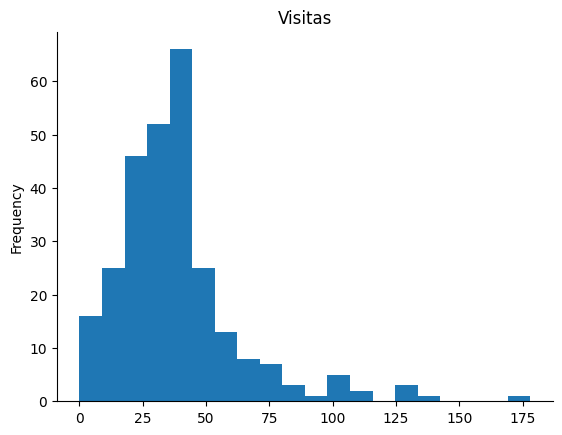

In [95]:
df_filtrado['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right']].set_visible(False)

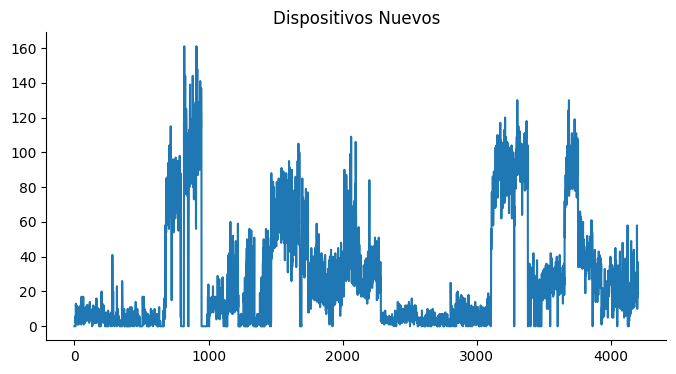

In [96]:
# @title Dispositivos Nuevos

from matplotlib import pyplot as plt
df['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')
plt.gca().spines[['top', 'right']].set_visible(False)

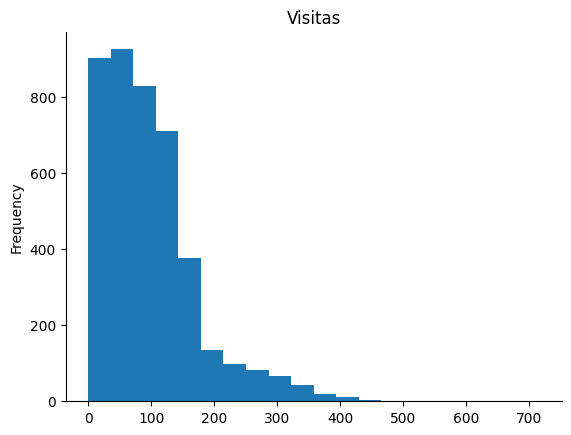

In [97]:
# @title Visitas

from matplotlib import pyplot as plt
df['Visitas'].plot(kind='hist', bins=20, title='Visitas')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Dispositivos Nuevos'}>

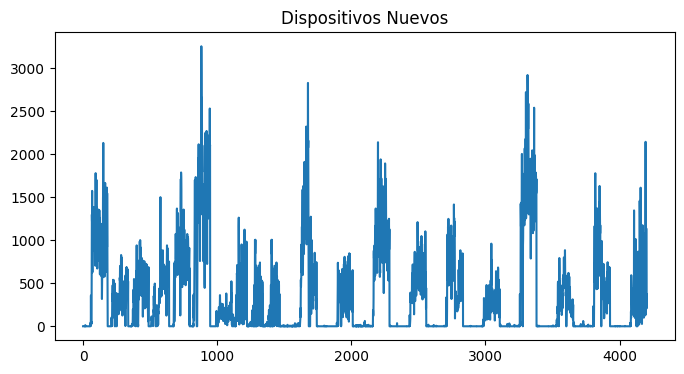

In [98]:
df['Sesiones'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

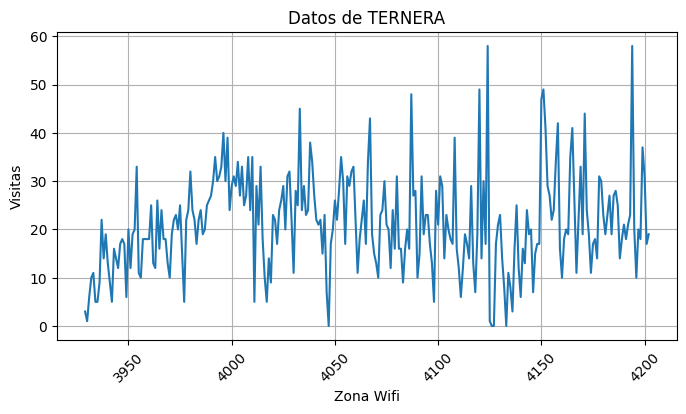

In [99]:
# Filtrar los datos donde la columna NOMBRE tenga el valor deseado
nombre_filtrado = "TERNERA"
df_filtrado = df[df["Corregimiento/Barrio"] == nombre_filtrado]

# Verificar si hay datos después del filtro
if df_filtrado.empty:
    print(f"No hay datos para '{nombre_filtrado}'.")
else:
    # Crear el gráfico (ejemplo: gráfico de líneas)
    plt.figure(figsize=(8, 8))
    #plt.plot(df_filtrado["Visitas"], df_filtrado["Logins"], marker='o', linestyle='-')
    df_filtrado['Dispositivos Nuevos'].plot(kind='line', figsize=(8, 4), title='Dispositivos Nuevos')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_filtrado}")
    plt.xlabel("Zona Wifi")
    plt.ylabel("Visitas")
    plt.xticks(rotation=45)
    plt.grid()

    # Mostrar el gráfico
    plt.show()


In [100]:
df

Corregimiento/Barrio                         Zona Wifi  \
0           NUEVO PARAISO          BIBLIOTECA NUEVO PARAISO   
1           NUEVO PARAISO          BIBLIOTECA NUEVO PARAISO   
2           NUEVO PARAISO          BIBLIOTECA NUEVO PARAISO   
3           NUEVO PARAISO          BIBLIOTECA NUEVO PARAISO   
4           NUEVO PARAISO          BIBLIOTECA NUEVO PARAISO   
...                   ...                               ...   
4198              TERNERA  INSPECCION DE POLICIA DE TERNERA   
4199              TERNERA  INSPECCION DE POLICIA DE TERNERA   
4200              TERNERA  INSPECCION DE POLICIA DE TERNERA   
4201              TERNERA  INSPECCION DE POLICIA DE TERNERA   
4202              TERNERA  INSPECCION DE POLICIA DE TERNERA   

                       Fecha  Visitas  Logins  Dispositivos Nuevos  Sesiones  \
0     04/01/2024 12:00:00 AM        0       0                    0         0   
1     04/02/2024 12:00:00 AM        0       0                    0         0   
2     04/03/2024 12:00:00 AM        0       0                    0         0   
3     04/04/2024 12:00:00 AM        0       0                    0         0   
4     04/05/2024 12:00:00 AM        0       0                    0         0   
...                      ...      ...     ...                  ...       ...   
4198  09/26/2024 12:00:00 AM       42      40                   18       332   
4199  09/27/2024 12:00:00 AM      107      91                   37      1137   
4200  09/28/2024 12:00:00 AM       80      62                   31       698   
4201  09/29/2024 12:00:00 AM       33      24                   17       207   
4202  09/30/2024 12:00:00 AM       28      25                   19       369   

      Consumidores  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
4198          15.0  
4199          34.0  
4200          26.0  
4201          11.0  
4202          17.0  

[4203 rows x 8 columns]

In [158]:
# Asegurar que la columna Fecha es de tipo datetime64
df_filtrado = df_filtrado.copy()
df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])  # Mantener datetime

# Obtener fecha mínima y máxima
fecha_min = df_filtrado["Fecha"].min()
fecha_max = df_filtrado["Fecha"].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2024-01-01 00:00:00
Fecha máxima: 2024-09-30 00:00:00
